# Exercise: RDataFrame and collections

The same dataset used in the previous exercise (`TTree` "dataset" in file `../data/example_file.root`) contains two vector columns `vec1` and `vec2`.<br>
The elements of `vec1` are distributed as a mixture of Gaussians, plus background noise.<br>
To remove the background noise, select the elements of `vec1` for which the square of the corresponding elements in `vec2` is less than 0.1.

Where are the peaks of this mixture of Gaussians?

### Useful links

- [RDataFrame: working with collections](https://root.cern/doc/master/classROOT_1_1RDataFrame.html#collections)
- [RVec reference](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html)

In [3]:
import ROOT
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

treename = "dataset"
filename = "example_file.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")



Columns in the dataset: { "a", "b", "vec1", "vec2" }


In [ ]:

# Open the file and get the tree (adjust path if needed)
file = uproot.open("example_file.root")
tree = file["dataset"]

# Load the vector branches (as awkward arrays)
vec1 = tree["vec1"].arrays(library="ak")["vec1"]
vec2 = tree["vec2"].arrays(library="ak")["vec2"]

# Condition: select elements of vec1 where vec2 squared < 0.1
condition = (vec2 ** 2) < 0.1

# Use awkward masking to filter vec1 elements accordingly
filtered_vec1 = vec1[condition]

# Flatten the filtered array to 1D for histogramming
flat_vec1 = ak.flatten(filtered_vec1)


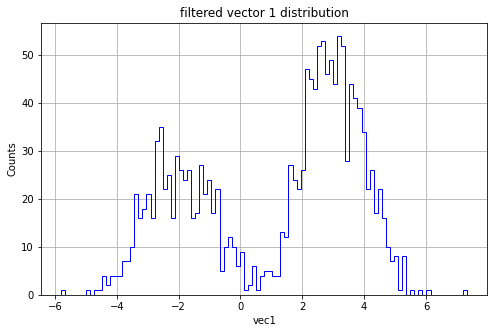

In [7]:
file= uproot.open("example_file.root")
tree=file["dataset"]

v1=tree["vec1"].arrays(library="ak")["vec1"]
v2=tree["vec2"].arrays(library="ak")["vec2"]

fltr= (v2*v2)<0.1

filter_v1= v1[fltr]

flat_v1= ak.flatten(filter_v1)


plt.figure(figsize=(8,5))
plt.hist(flat_v1, bins=100, histtype='step', color='blue')
plt.xlabel('vec1')
plt.ylabel('Counts')
plt.title('filtered vector 1 distribution')
plt.grid(True)
plt.show()

